# Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
from pandas import DataFrame

%matplotlib inline 

# Retrieving the Data

In [2]:
with open("/Users/szkfzx/datasets/imaterialist-challenge-furniture-2018/train.json") as datafile1: #first check if it's a valid json file or not
    data1 = json.load(datafile1)
with open("/Users/szkfzx/datasets/imaterialist-challenge-furniture-2018/test.json") as datafile2: #first check if it's a valid json file or not
    data2 = json.load(datafile2)
with open("/Users/szkfzx/datasets/imaterialist-challenge-furniture-2018/validation.json") as datafile3: #first check if it's a valid json file or not
    data3 = json.load(datafile3)
test = pd.DataFrame(data1)    
test.shape

(194828, 2)

# Convertng JSON format data into Tabular data

In [3]:
# for training data
my_dic_data = data1
keys = my_dic_data.keys()
print(keys)
dict_you_want1 = {'my_items1':my_dic_data['annotations']for key in keys}
dict_you_want2 = {'my_items2':my_dic_data['images']for key in keys}
df = pd.DataFrame(dict_you_want1)
fd = pd.DataFrame(dict_you_want2)
df2=df['my_items1'].apply(pd.Series)
print("df2",df2.head())
fd2=fd['my_items2'].apply(pd.Series)
print("fd2",fd2.head())
train_data = pd.merge(df2, fd2, on='image_id', how='outer')

# for validation data
my_dic_data = data3
keys= my_dic_data.keys()
print(keys)
dict_you_want1={'my_items1':my_dic_data['annotations']for key in keys}
dict_you_want2={'my_items2':my_dic_data['images']for key in keys}
df=pd.DataFrame(dict_you_want1)
fd = pd.DataFrame(dict_you_want2)
df2=df['my_items1'].apply(pd.Series)
print("df2",df2.head())
fd2=fd['my_items2'].apply(pd.Series)
print("fd2",fd2.head())
validation_data = pd.merge(df2, fd2, on='image_id', how='outer')

# for test data
my_dic_data = data2
keys= my_dic_data.keys()
print(keys)
dict_you_want2={'my_items2':my_dic_data['images']for key in keys}
fd = pd.DataFrame(dict_you_want2)
test_data=fd['my_items2'].apply(pd.Series)
print("test_data",test_data.head())

dict_keys(['images', 'annotations'])
df2    image_id  label_id
0         1         5
1         2         5
2         3         5
3         4         5
4         5         5
fd2                                                  url  image_id
0  [https://img13.360buyimg.com/imgzone/jfs/t2857...         1
1  [http://www.tengdakeli.cn/350/timg01/uploaded/...         2
2  [https://img13.360buyimg.com/imgzone/jfs/t8899...         3
3  [http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2...         4
4  [http://a.vpimg4.com/upload/merchandise/287883...         5
dict_keys(['images', 'annotations'])
df2    image_id  label_id
0         1        38
1         2        63
2         3        33
3         4       126
4         5        18
fd2                                                  url  image_id
0  [http://www.ghs.net/public/images/fb/3d/51/3be...         1
1  [https://img.alicdn.com/imgextra/TB2chFei9YH8K...         2
2  [http://static-news.17house.com/web/news/20160...         3
3  [http://img00

In [4]:
train_data['url'] = train_data['url'].apply(lambda x:str(x[0]))
test_data['url'] = test_data['url'].apply(lambda x:str(x[0]))
validation_data['url'] = validation_data['url'].apply(lambda x:str(x[0]))


**Training data**

In [5]:
train_data.head()

,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...
2,3,5,https://img13.360buyimg.com/imgzone/jfs/t8899/...
3,4,5,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...
4,5,5,http://a.vpimg4.com/upload/merchandise/287883/...


**Validation data**

In [6]:
validation_data.head()

,image_id,label_id,url
0,1,38,http://www.ghs.net/public/images/fb/3d/51/3beb...
1,2,63,https://img.alicdn.com/imgextra/TB2chFei9YH8KJ...
2,3,33,http://static-news.17house.com/web/news/201602...
3,4,126,http://img000.hc360.cn/g6/M07/CB/88/wKhQsFNNVJ...
4,5,18,https://img.alicdn.com/imgextra/T1sLtpFH8aXXXX...


**Test data**

In [7]:
test_data.head()

,url,image_id
0,https://img13.360buyimg.com/imgzone/jfs/t13174...,1
1,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg,2
2,https://img.alicdn.com/imgextra/TB19HtjKXXXXXc...,3
3,https://img13.360buyimg.com/imgzone/jfs/t16498...,4
4,http://img4.99114.com/group1/M00/7D/C5/wKgGTFf...,5


In [8]:
print("size of training data", train_data.shape)
print("size of validation data", validation_data.shape)
print("size of test data", test_data.shape)

size of training data (194828, 3)
size of validation data (6400, 3)
size of test data (12800, 2)


# Checking for missing data

## Missing Data in training data set

In [9]:
# missing data in training data set
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
missing_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
url,0,0.0
label_id,0,0.0
image_id,0,0.0


## Missing Data in validation data set

In [10]:
# missing data in validation data set
total = validation_data.isnull().sum().sort_values(ascending = False)
percent = (validation_data.isnull().sum()/validation_data.isnull().count()).sort_values(ascending = False)
missing_validation_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_validation_data.head()

,Total,Percent
url,0,0.0
label_id,0,0.0
image_id,0,0.0


## Missing data in test data set

In [11]:
# missing data in test data 
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending = False)
missing_test_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_test_data.head()

,Total,Percent
image_id,0,0.0
url,0,0.0


# Open the URL

In [12]:
# now open the URL
temp = 4
print('image_id', train_data['image_id'][temp])
print('url:', train_data['url'][temp])

image_id 5
url: http://a.vpimg4.com/upload/merchandise/287883/QQI-390870207-1.jpg


# Lets display some images from URLs

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 

def display_category(urls, category_name):
    img_style = "width: 180px; margin: 0px; float: left; border: 1px solid black;"
    images_list = ''.join([f"<img style='{img_style}' src='{u}' />" for _, u in urls.head(12).iteritems()])

    display(HTML(images_list))

### Training data images

In [14]:
urls = train_data['url'][15:30]
display_category(urls, "")

### Test data images

In [15]:
urls = test_data['url'][15:30]
display_category(urls, "")

### validation data images

In [16]:
urls = validation_data['url'][15:30]
display_category(urls, "")

In [17]:
# Unique URL's
train_data.nunique()

image_id    194828
label_id       128
url         194828
dtype: int64

# Distribution of labels in training data set


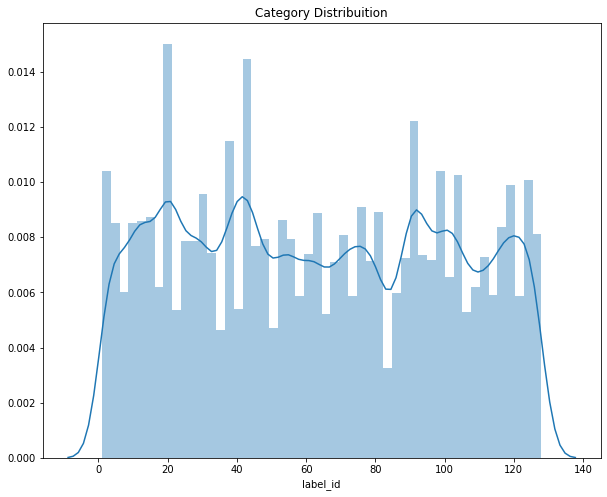

In [18]:
#Class distribution
plt.figure(figsize = (10, 8))
plt.title('Category Distribuition')
sns.distplot(train_data['label_id'])

plt.show()

# Most frequent labels in training data set

In [19]:
# Occurance of label_id in decreasing order(Top categories)
temp = pd.DataFrame(train_data.label_id.value_counts().head(8))
temp.reset_index(inplace=True)
temp.columns = ['label_id','count']
temp

,label_id,count
0,20,3996
1,42,3973
2,92,2666
3,12,2609
4,125,2598
5,21,2577
6,122,2462
7,3,2368


* **Most frequent label is 20 followed by 42.**

Text(0.5, 1.0, 'Distribution of label ids')

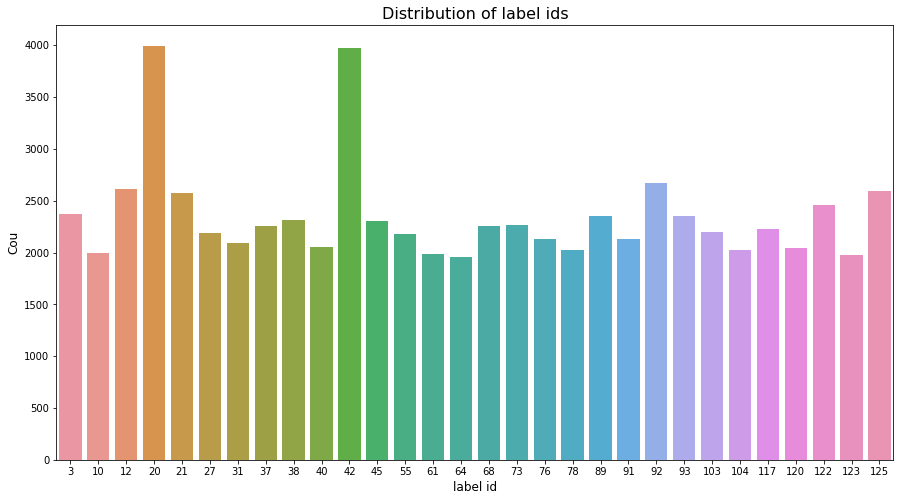

In [20]:
plt.figure(figsize=(15,8))
count = train_data['label_id'].value_counts().head(30)
sns.barplot(count.index,  count.values,)
plt.xlabel('label id', fontsize=12)
plt.ylabel('Cou', fontsize=12)
plt.title("Distribution of label ids", fontsize=16)

# Lets extract the website name and see their occurances

In [33]:
# Extract website_name for train data
temp_list = list()
for path in train_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
train_data['website_name'] = temp_list
# Extract website_name for test data
temp_list = list()
for path in test_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
test_data['website_name'] = temp_list
# Extract website_name for validation data
temp_list = list()
for path in validation_data['url']:
    temp_list.append((path.split('//', 1)[1]).split('/', 1)[0])
validation_data['website_name'] = temp_list


### We have added one new column "site_name". lets see

In [22]:
print("Training data size",train_data.shape)
print("test data size",test_data.shape)
print("validation data size",validation_data.shape)


Training data size (194828, 4)
test data size (12800, 3)
validation data size (6400, 4)


**new training data**

In [23]:
train_data.head()

,image_id,label_id,url,website_name
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...,img13.360buyimg.com
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...,www.tengdakeli.cn
2,3,5,https://img13.360buyimg.com/imgzone/jfs/t8899/...,img13.360buyimg.com
3,4,5,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...,img4.tbcdn.cn
4,5,5,http://a.vpimg4.com/upload/merchandise/287883/...,a.vpimg4.com


**New test data**

In [24]:
test_data.head()

,url,image_id,website_name
0,https://img13.360buyimg.com/imgzone/jfs/t13174...,1,img13.360buyimg.com
1,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg,2,img35.ddimg.cn
2,https://img.alicdn.com/imgextra/TB19HtjKXXXXXc...,3,img.alicdn.com
3,https://img13.360buyimg.com/imgzone/jfs/t16498...,4,img13.360buyimg.com
4,http://img4.99114.com/group1/M00/7D/C5/wKgGTFf...,5,img4.99114.com


**New validation data**

In [25]:
validation_data.head()

,image_id,label_id,url,website_name
0,1,38,http://www.ghs.net/public/images/fb/3d/51/3beb...,www.ghs.net
1,2,63,https://img.alicdn.com/imgextra/TB2chFei9YH8KJ...,img.alicdn.com
2,3,33,http://static-news.17house.com/web/news/201602...,static-news.17house.com
3,4,126,http://img000.hc360.cn/g6/M07/CB/88/wKhQsFNNVJ...,img000.hc360.cn
4,5,18,https://img.alicdn.com/imgextra/T1sLtpFH8aXXXX...,img.alicdn.com


# Top Occurances of websites in the data

## Top Occurances of websites in the training data

Total unique websites :  10291


Text(0.5, 1.0, 'websites names with their occurances')

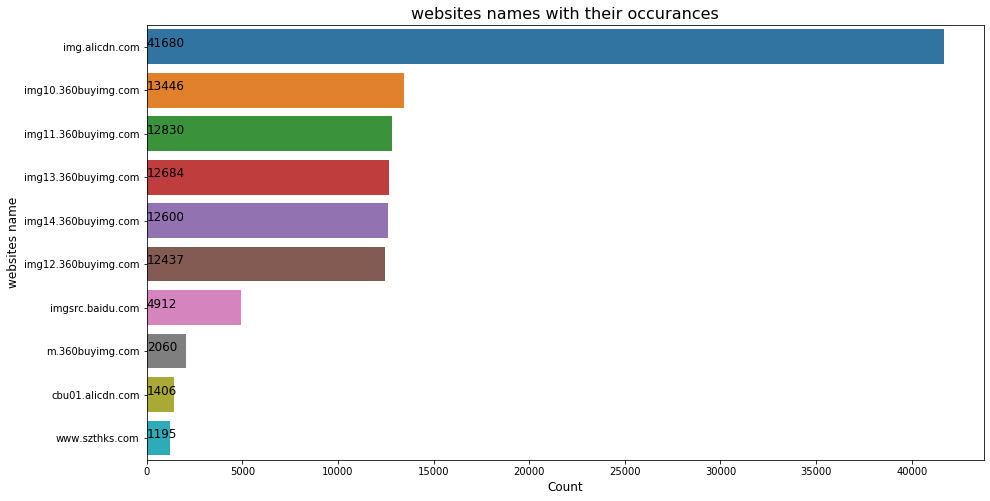

In [26]:
print("Total unique websites : ",len(train_data.website_name.value_counts()))
plt.figure(figsize=(15,8))
count = train_data.website_name.value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('websites name', fontsize=12)
plt.title("websites names with their occurances", fontsize=16)

* **Training data is taken from 10291 unique websites.**

## Top Occurances of websites in the test data

Total unique websites :  1847


Text(0.5, 1.0, 'Website names with their occurances')

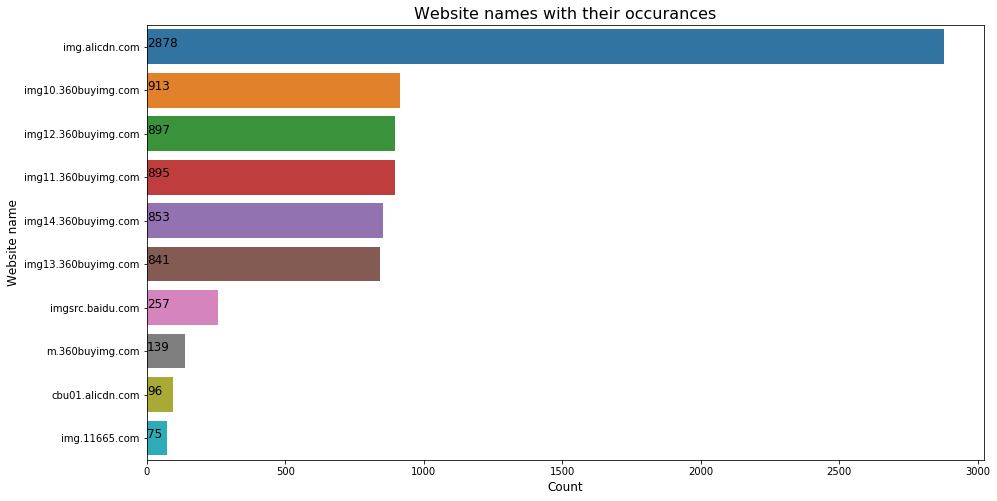

In [27]:
print("Total unique websites : ",len(test_data.website_name.value_counts()))
plt.figure(figsize=(15,8))
count = test_data.website_name.value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Website name', fontsize=12)
plt.title("Website names with their occurances", fontsize=16)

* **Test data is taken from 1847 unique websites.**

## Top Occurances of websites in the validation data

Total unique websites :  1214


Text(0.5, 1.0, 'Website names with their occurances')

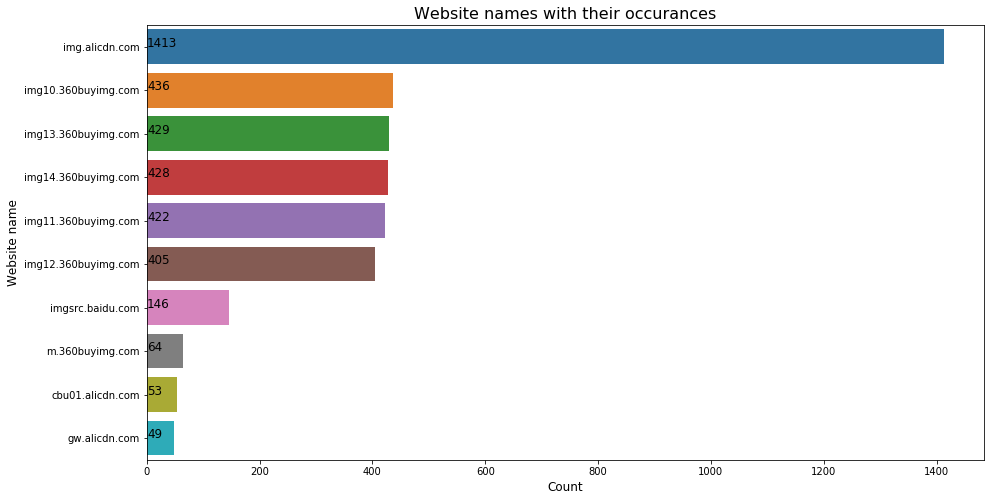

In [28]:
print("Total unique websites : ",len(validation_data.website_name.value_counts()))
plt.figure(figsize=(15,8))
count = validation_data.website_name.value_counts().head(10)
sns.barplot(count.values, count.index)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Website name', fontsize=12)
plt.title("Website names with their occurances", fontsize=16)

* **Validation data is taken from 1214 unique websites.**

# More To come. Stayed Tuned.!!